<a href="https://colab.research.google.com/github/AimjGuytidy/Neural_network/blob/main/Conv_NN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import zipfile

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip', 'r')

zip_ref.extractall()

zip_ref.close()

--2021-09-09 17:23:58--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.250.148.128, 209.85.200.128, 209.85.234.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.250.148.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109579078 (105M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.50M   184MB/s    in 0.6s    

2021-09-09 17:23:59 (184 MB/s) - ‘pizza_steak.zip.1’ saved [109579078/109579078]



## inspect the Data

In [ ]:
! ls pizza_steak/

test  train


In [ ]:
! ls pizza_steak/test

pizza  steak


In [ ]:
! ls pizza_steak/test/pizza

1001116.jpg  1507019.jpg  2242047.jpg  2944567.jpg  3669673.jpg  556507.jpg
1032754.jpg  1512557.jpg  22489.jpg    296426.jpg   3724187.jpg  565112.jpg
103708.jpg   153195.jpg   2250611.jpg  2971095.jpg  3724353.jpg  573054.jpg
1060407.jpg  1555015.jpg  226472.jpg   2992605.jpg  3724416.jpg  614236.jpg
106507.jpg   1594097.jpg  2265512.jpg  2997525.jpg  3728155.jpg  614981.jpg
1067986.jpg  1618659.jpg  2276783.jpg  300157.jpg   3729167.jpg  61656.jpg
1106738.jpg  1636919.jpg  2296393.jpg  3042459.jpg  373847.jpg	 625434.jpg
1119571.jpg  1655630.jpg  2320458.jpg  3049449.jpg  3754474.jpg  645087.jpg
11297.jpg    1686938.jpg  2323860.jpg  3092704.jpg  3758160.jpg  648055.jpg
1152100.jpg  1687143.jpg  2343304.jpg  309892.jpg   376625.jpg	 65128.jpg
1179703.jpg  1691503.jpg  2392727.jpg  3174637.jpg  3770514.jpg  666569.jpg
1180001.jpg  1694874.jpg  2398925.jpg  321526.jpg   3784357.jpg  678708.jpg
1180273.jpg  1765727.jpg  2406842.jpg  3216107.jpg  3785667.jpg  714866.jpg
1183595.jpg  177

In [ ]:
! ls pizza_steak/train

pizza  steak


In [ ]:
! ls -la pizza_steak

total 24
drwxr-xr-x 4 root root 4096 Sep  8 19:20 .
drwxr-xr-x 1 root root 4096 Sep  8 19:20 ..
-rw-r--r-- 1 root root 6148 Sep  8 19:20 .DS_Store
drwxr-xr-x 4 root root 4096 Sep  8 19:20 test
drwxr-xr-x 4 root root 4096 Sep  8 19:20 train


In [ ]:
import os
for dirpath, dirname, filename in os.walk("pizza_steak"):
  print("there are {} directories and {} in '{}'.".format(len(dirname),len(filename),dirpath))

there are 2 directories and 1 in 'pizza_steak'.
there are 2 directories and 1 in 'pizza_steak/train'.
there are 0 directories and 750 in 'pizza_steak/train/pizza'.
there are 0 directories and 750 in 'pizza_steak/train/steak'.
there are 2 directories and 1 in 'pizza_steak/test'.
there are 0 directories and 250 in 'pizza_steak/test/pizza'.
there are 0 directories and 250 in 'pizza_steak/test/steak'.


In [ ]:
#other ways of checking the number of images in our files
num_pizza_train = len(os.listdir("pizza_steak/train/pizza"))
num_pizza_train

750

In [ ]:
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img
import tensorflow as tf
import pandas as pd
%matplotlib inline

In [ ]:
data_dir = pathlib.Path("pizza_steak/train")
class_names = np.array(sorted([item.name for item in data_dir.glob("*")]))
print(class_names)

['.DS_Store' 'pizza' 'steak']


In [ ]:
class_names = class_names[1:]
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
import os
import random
def view_img(target_dir,target_class):
  target_folder = target_dir+"/"+target_class
  #generate random image
  rand_img = random.sample(os.listdir(target_folder),1)
  print(rand_img[0])

  #let's visualize the image
  im = img.imread(target_folder + "/" + rand_img[0])
  plt.imshow(im)
  plt.title(target_class)
  plt.axis("off");

  print(f"image shape:{im.shape}")
  return im

1654444.jpg
image shape:(289, 512, 3)


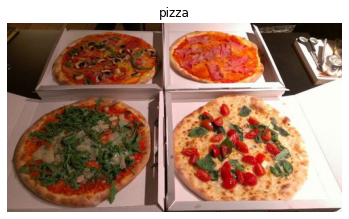

In [ ]:
image = view_img("pizza_steak/train","pizza")

In [ ]:
image.shape[0],image.shape[1]

(512, 512)

In [ ]:
image[0][1]

array([185, 187, 174], dtype=uint8)

In [ ]:
image[0].shape

(512, 3)

In [ ]:
image[0]

array([[213, 217, 203],
       [185, 187, 174],
       [164, 165, 149],
       ...,
       [  6,   4,   5],
       [  6,   4,   5],
       [  6,   4,   5]], dtype=uint8)

In [ ]:
image.max()

255

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [ ]:

#set seed
tf.random.set_seed(42)

#scale/normalize the data
traindatagen = ImageDataGenerator(rescale=1./255)
validatagen = ImageDataGenerator(rescale=1./255)

#set paths for our data
train_dir ="/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

#import data from directories
train_data = traindatagen.flow_from_directory(train_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)
valid_data = validatagen.flow_from_directory(test_dir,target_size=(224,224),class_mode="binary",batch_size=32,seed=42)


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:

#let's build a cnn model
model_1 = tf.keras.models.Sequential([
          tf.keras.layers.Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
          tf.keras.layers.Conv2D(10,3,activation="relu"),
          tf.keras.layers.MaxPool2D(pool_size=2,padding="valid"),
          tf.keras.layers.Conv2D(10,3,activation="relu"),
          tf.keras.layers.Conv2D(10,3,activation="relu"),
          tf.keras.layers.MaxPool2D(2,padding="valid"),
          tf.keras.layers.Flatten(),
          tf.keras.layers.Dense(1,activation="sigmoid")
])
#let's compile our model
model_1.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])
#fit the model
history_1 = model_1.fit(train_data,epochs=3,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps=len(valid_data))

In [ ]:
len(train_data)

47

In [ ]:
model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 110, 110, 10)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 108, 108, 10)      910       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 106, 106, 10)      910       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 53, 53, 10)        0         
_________________________________________________________________
flatten (Flatten)            (None, 28090)             0

#### Using the same model we used before 

In [ ]:
tf.random.set_seed(42)

#create the model from the playground
model_2 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(224,224,3)),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(4,activation="relu"),
          tf.keras.layers.Dense(1,"sigmoid")
])
#compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])
#fit the model
history_2=model_2.fit(train_data,epochs=5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 10s 209ms/step - loss: 0.9115 - accuracy: 0.4860 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 2/5
47/47 [==============================] - 9s 201ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 4/5
47/47 [==============================] - 10s 205ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 5/5
47/47 [==============================] - 9s 202ms/step - loss: 0.6932 - accuracy: 0.5000 - val_loss: 0.6931 - val_accuracy: 0.5000


In [ ]:
tf.random.set_seed(42)

#create the model from the playground
model_3 = tf.keras.Sequential([
          tf.keras.layers.Flatten(input_shape=(224,224,3)),
          tf.keras.layers.Dense(100,activation="relu"),
          tf.keras.layers.Dense(100,activation="relu"),
          tf.keras.layers.Dense(100,activation="relu"),
          tf.keras.layers.Dense(1,"sigmoid")
])
#compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer = "Adam",
                metrics=["accuracy"])
#fit the model
history_3=model_3.fit(train_data,epochs=5,
            steps_per_epoch = len(train_data),
            validation_data = valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 214ms/step - loss: 5.2049 - accuracy: 0.5833 - val_loss: 1.3744 - val_accuracy: 0.7460
Epoch 2/5
47/47 [==============================] - 10s 208ms/step - loss: 1.5246 - accuracy: 0.6920 - val_loss: 0.5055 - val_accuracy: 0.7480
Epoch 3/5
47/47 [==============================] - 10s 203ms/step - loss: 0.8919 - accuracy: 0.6773 - val_loss: 0.5077 - val_accuracy: 0.7920
Epoch 4/5
47/47 [==============================] - 9s 200ms/step - loss: 0.6280 - accuracy: 0.7407 - val_loss: 0.5599 - val_accuracy: 0.7340
Epoch 5/5
47/47 [==============================] - 9s 201ms/step - loss: 0.5151 - accuracy: 0.7647 - val_loss: 0.9634 - val_accuracy: 0.6320


In [ ]:
model_3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 150528)            0         
_________________________________________________________________
dense_4 (Dense)              (None, 100)               15052900  
_________________________________________________________________
dense_5 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 101       
Total params: 15,073,201
Trainable params: 15,073,201
Non-trainable params: 0
_________________________________________________________________


#### Visualize the data

44449.jpg
image shape:(384, 512, 3)
3157832.jpg
image shape:(512, 512, 3)


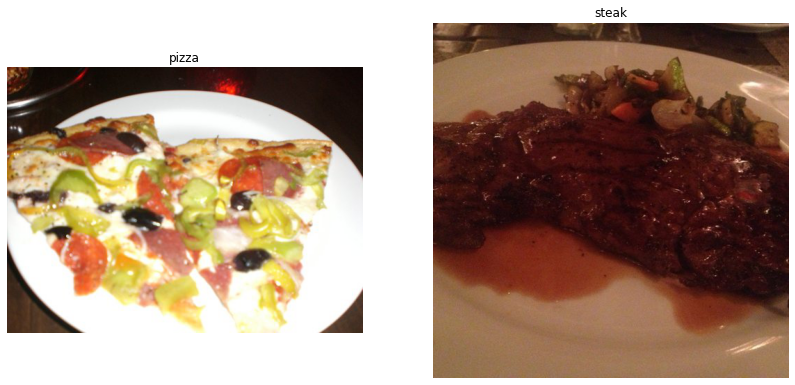

In [ ]:
#let's visualize the data
plt.figure(figsize=[14,14])
plt.subplot(1,2,1)
imy = view_img("pizza_steak/train","pizza")
plt.subplot(1,2,2)
imy1 = view_img("pizza_steak/train","steak")

In [ ]:
#######################################
"""
from tensorflow.keras.preprocessing.image import imagedataGenerator
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'
train_gen = ImageDataGenerator(rescale=1./225)
test_gen = ImageDataGenerator(rescale=1./225)
train_data = train_gen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode='binary')
.......
"""
########################################

"\nfrom tensorflow.keras.preprocessing.image import imagedataGenerator\ntrain_dir = 'pizza_steak/train'\ntest_dir = 'pizza_steak/test'\ntrain_gen = ImageDataGenerator(rescale=1./225)\ntest_gen = ImageDataGenerator(rescale=1./225)\ntrain_data = train_gen.flow_from_directory(train_dir,batch_size=32,target_size=(224,224),class_mode='binary')\n.......\n"

In [ ]:
images,labels = train_data.next()
len(images)

32

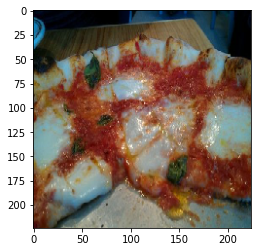

In [ ]:
plt.imshow(images[30])

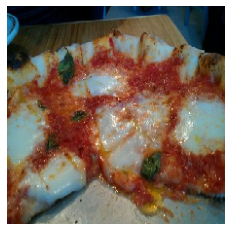

In [ ]:
plt.imshow(images[30])
plt.axis("off");

In [ ]:
images,labels = train_data.next()

In [ ]:
labels

array([0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 0., 1., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1.],
      dtype=float32)

### Creating a baseline model

In [ ]:
#we import necessary tools
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D
from tensorflow.keras.optimizers import Adam,SGD
from tensorflow.keras import Sequential 

In [ ]:
#let's create our baseline model
tf.random.set_seed(42)
#create the model
model_base = Sequential([
  Conv2D(filters=10,#determines how many sliding windows going across the input(image) (number of filters,if high we get a complex model)
         kernel_size=(3,3),#determines the size of the sliding window going across the input
         strides=(1,1),#determines the steps the sliding window takes across the input
         padding="valid",#if it is "same" then the output has the same shape as the input, it "valid" the output is compressed
         activation="relu",
         input_shape = (224,224,3)),
  Conv2D(filters=10,kernel_size=3,
         activation="relu"),
  #MaxPool2D(pool_size=3)
  Conv2D(filters=10,kernel_size=3,
         padding="valid",activation="relu"),
  Conv2D(filters=10,kernel_size=3,activation="relu"),
  # MaxPool2D(pool_size=3)
  Flatten(),
  Dense(1,activation="sigmoid")
])

In [ ]:
model_base.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 220, 220, 10)      910       
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 218, 218, 10)      910       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 216, 216, 10)      910       
_________________________________________________________________
flatten_3 (Flatten)          (None, 466560)            0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 466561    
Total params: 469,571
Trainable params: 469,571
Non-trainable params: 0
________________________________________________

In [ ]:
#compile the model
model_base.compile(loss = "binary_crossentropy",
                   optimizer = Adam(),
                   metrics = ["accuracy"])

In [ ]:
import os
run_dir = os.path.join(os.curdir,"my_logs")
def get_curdir():
  import time
  cur_time =time.strftime("run_%Y_%d_%m-%H_%M_%S")
  return os.path.join(run_dir,cur_time)
run_logdir = get_curdir()
#fit the model
history_base = model_base.fit(train_data,
               epochs=5,
               steps_per_epoch = len(train_data),
               validation_data = valid_data,
               validation_steps = len(valid_data),callbacks = [tf.keras.callbacks.TensorBoard(run_logdir)])

Epoch 1/5
47/47 [==============================] - 16s 319ms/step - loss: 0.6322 - accuracy: 0.6780 - val_loss: 0.3682 - val_accuracy: 0.8420
Epoch 2/5
47/47 [==============================] - 11s 239ms/step - loss: 0.4276 - accuracy: 0.8120 - val_loss: 0.3345 - val_accuracy: 0.8660
Epoch 3/5
47/47 [==============================] - 11s 239ms/step - loss: 0.3503 - accuracy: 0.8620 - val_loss: 0.3108 - val_accuracy: 0.8740
Epoch 4/5
47/47 [==============================] - 11s 241ms/step - loss: 0.2349 - accuracy: 0.9200 - val_loss: 0.3547 - val_accuracy: 0.8440
Epoch 5/5
47/47 [==============================] - 11s 237ms/step - loss: 0.1160 - accuracy: 0.9667 - val_loss: 0.3920 - val_accuracy: 0.8380


In [ ]:
%load_ext tensorboard
%tensorboard --logdir my_logs

### Model Evaluation

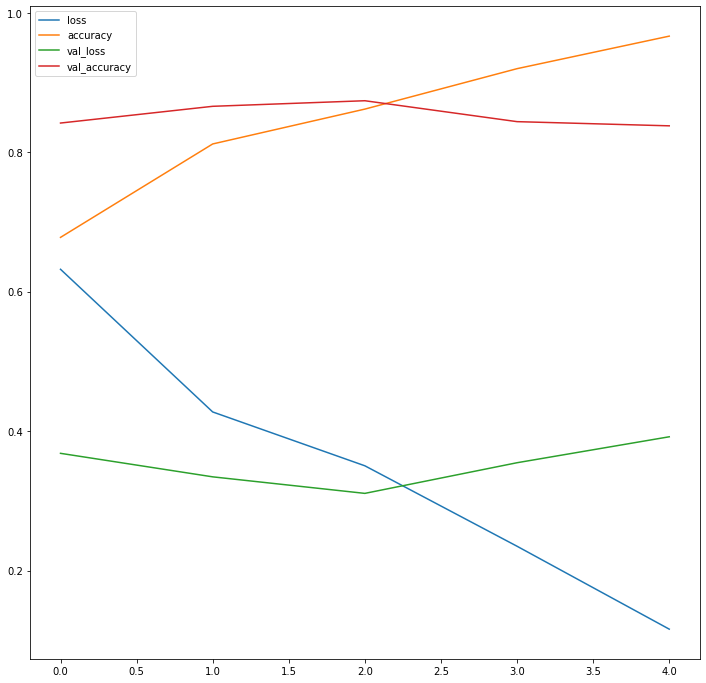

In [ ]:
#let's visualize our model performance
# plt.figure(figsize=[12,12])
pd.DataFrame(history_base.history).plot(figsize=[12,12]);


In [ ]:
def plot_loss_acc(history):
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = history.epoch

  plt.figure()
  plt.plot(epochs,loss,label="loss",color = "magenta")
  plt.plot(epochs,val_loss,label="val_loss",color="green")
  plt.title("Loss")
  plt.legend()


  plt.figure()
  plt.plot(epochs,accuracy,label="accuracy",color = "orange")
  plt.plot(epochs,val_accuracy,label="val_accuracy",color="blue")
  plt.title("Accuracy")
  plt.legend()

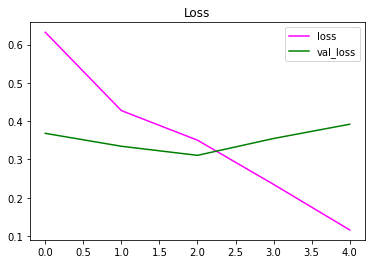

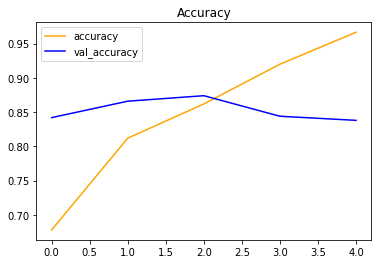

In [ ]:
plot_loss_acc(history_base)

In [ ]:
history_base.epoch

[0, 1, 2, 3, 4]

### Adjusting model parameters

We are going to reduce overfitting by using **max pooling** which is a method of *downsizing* sliding windows by picking the maximum value in a designated pixelated values

In [ ]:
#improving our baseline model by adding maxpool2d algorithm to our model
model_4 = Sequential([
    Conv2D(filters=10,kernel_size=3,activation="relu",input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10,kernel_size=3,activation="relu"),
    MaxPool2D(pool_size=2),
    Conv2D(filters=10,kernel_size=3,activation="relu"),
    MaxPool2D(pool_size=2),
    Flatten(),
    Dense(1,"sigmoid")

])

In [ ]:
#let's compile our model
model_4.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
#fitting the model
hist4 = model_4.fit(train_data,epochs=5,
            steps_per_epoch=len(train_data),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 11s 219ms/step - loss: 0.5818 - accuracy: 0.7033 - val_loss: 0.5088 - val_accuracy: 0.7400
Epoch 2/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4773 - accuracy: 0.7873 - val_loss: 0.3772 - val_accuracy: 0.8580
Epoch 3/5
47/47 [==============================] - 10s 207ms/step - loss: 0.4150 - accuracy: 0.8187 - val_loss: 0.3329 - val_accuracy: 0.8680
Epoch 4/5
47/47 [==============================] - 10s 206ms/step - loss: 0.3760 - accuracy: 0.8413 - val_loss: 0.3030 - val_accuracy: 0.8740
Epoch 5/5
47/47 [==============================] - 10s 208ms/step - loss: 0.3516 - accuracy: 0.8467 - val_loss: 0.2915 - val_accuracy: 0.8800


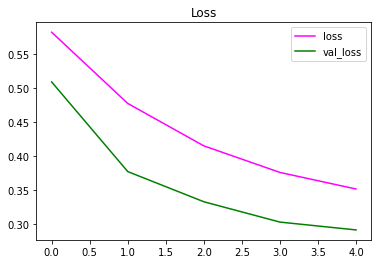

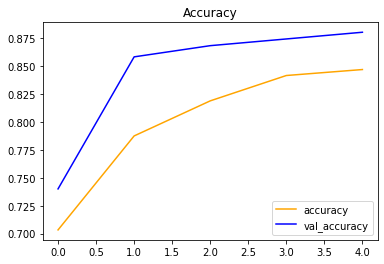

In [ ]:
plot_loss_acc(hist4)

In [ ]:
model_4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 222, 222, 10)      280       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 111, 111, 10)      0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 109, 109, 10)      910       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 54, 54, 10)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 52, 52, 10)        910       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 26, 26, 10)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 6760)             

In [ ]:
len(train_data)

47

### Data Augmentation

In [ ]:
#data augmentation using  ImageDataGenerator class
traindatagen_augm =  ImageDataGenerator(rescale=1/255.,
                                        rotation_range=0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip=True,
                                        shear_range=0.3,
                                        height_shift_range=0.3,
                                        width_shift_range=0.2)

In [ ]:
#let's create augmented data
train_data_augm = traindatagen_augm.flow_from_directory(train_dir,target_size=(224,224),class_mode='binary',shuffle=False)
trainy = traindatagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='binary',shuffle=False)

Found 1500 images belonging to 2 classes.
Found 1500 images belonging to 2 classes.


In [ ]:
images,labels = trainy.next()
images_aug,labels_aug = train_data_augm.next()

(-0.5, 223.5, 223.5, -0.5)

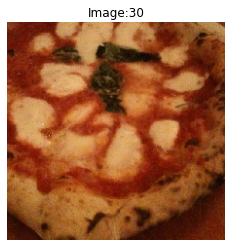

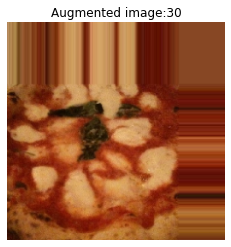

In [ ]:
randnum = random.randint(0,32)
plt.imshow(images[randnum])
plt.title(f"Image:{randnum}")
plt.axis("off")
plt.figure()
plt.imshow(images_aug[randnum])
plt.title(f"Augmented image:{randnum}")
plt.axis("off")

In [ ]:
#let's create a model with augmented data
model_5 = Sequential([
  Conv2D(filters = 10,kernel_size= 3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(filters = 10,kernel_size= 3,activation="relu"),
  MaxPool2D(),
  Conv2D(filters = 10,kernel_size= 3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,"sigmoid")  
])

In [ ]:
#compile the model
model_5.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
#fit the model
hist5=model_5.fit(train_data_augm,epochs=5,
            steps_per_epoch=len(train_data_augm),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 25s 522ms/step - loss: 0.7146 - accuracy: 0.4587 - val_loss: 0.6900 - val_accuracy: 0.5380
Epoch 2/5
47/47 [==============================] - 24s 515ms/step - loss: 0.6941 - accuracy: 0.4773 - val_loss: 0.6745 - val_accuracy: 0.5940
Epoch 3/5
47/47 [==============================] - 24s 514ms/step - loss: 0.7082 - accuracy: 0.4693 - val_loss: 0.6823 - val_accuracy: 0.6360
Epoch 4/5
47/47 [==============================] - 24s 515ms/step - loss: 0.7086 - accuracy: 0.5267 - val_loss: 0.6714 - val_accuracy: 0.5300
Epoch 5/5
47/47 [==============================] - 24s 514ms/step - loss: 0.6930 - accuracy: 0.5360 - val_loss: 0.6917 - val_accuracy: 0.5640


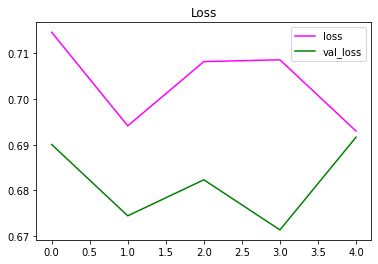

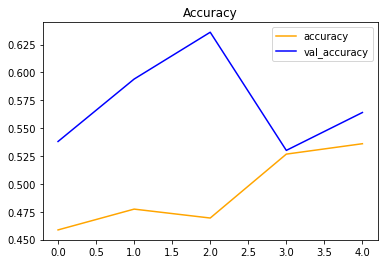

In [ ]:
plot_loss_acc(hist5)

In [ ]:
train_data_augm1 = traindatagen_augm.flow_from_directory(train_dir,target_size=(224,224),class_mode='binary',shuffle=True)


Found 1500 images belonging to 2 classes.


In [ ]:
#let's create a model with augmented data
model_6 = Sequential([
  Conv2D(filters = 10,kernel_size= 3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(filters = 10,kernel_size= 3,activation="relu"),
  MaxPool2D(),
  Conv2D(filters = 10,kernel_size= 3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,"sigmoid")  
])

In [ ]:
#compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
#fit the model
hist6=model_6.fit(train_data_augm1,epochs=5,
            steps_per_epoch=len(train_data_augm1),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 25s 528ms/step - loss: 0.6514 - accuracy: 0.6093 - val_loss: 0.6250 - val_accuracy: 0.6000
Epoch 2/5
47/47 [==============================] - 25s 530ms/step - loss: 0.5693 - accuracy: 0.7147 - val_loss: 0.4317 - val_accuracy: 0.8160
Epoch 3/5
47/47 [==============================] - 25s 536ms/step - loss: 0.5177 - accuracy: 0.7487 - val_loss: 0.4170 - val_accuracy: 0.8040
Epoch 4/5
47/47 [==============================] - 25s 543ms/step - loss: 0.4906 - accuracy: 0.7553 - val_loss: 0.3506 - val_accuracy: 0.8560
Epoch 5/5
47/47 [==============================] - 26s 545ms/step - loss: 0.4847 - accuracy: 0.7673 - val_loss: 0.3607 - val_accuracy: 0.8340


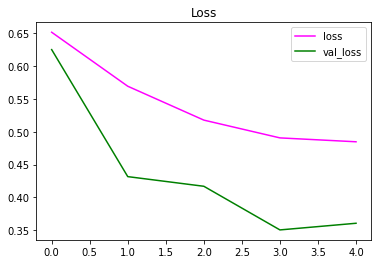

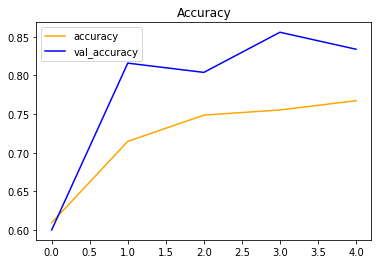

In [ ]:
plot_loss_acc(hist6)

### Tuning the model

In [ ]:
#let's create a model with augmented data
model_7 = Sequential([
  Conv2D(filters = 32,kernel_size= 3,activation="relu",input_shape=(224,224,3)),
  MaxPool2D(),
  Conv2D(filters = 32,kernel_size= 3,activation="relu"),
  MaxPool2D(),
  Conv2D(filters = 32,kernel_size= 3,activation="relu"),
  MaxPool2D(),
  Flatten(),
  Dense(1,"sigmoid")  
])

#compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

#fit the model
hist7=model_7.fit(train_data_augm1,epochs=5,
            steps_per_epoch=len(train_data_augm1),
            validation_data=valid_data,
            validation_steps=len(valid_data))

Epoch 1/5
47/47 [==============================] - 29s 558ms/step - loss: 0.6416 - accuracy: 0.6293 - val_loss: 0.4661 - val_accuracy: 0.8180
Epoch 2/5
47/47 [==============================] - 25s 530ms/step - loss: 0.5407 - accuracy: 0.7340 - val_loss: 0.4020 - val_accuracy: 0.8180
Epoch 3/5
47/47 [==============================] - 25s 539ms/step - loss: 0.4951 - accuracy: 0.7667 - val_loss: 0.3499 - val_accuracy: 0.8560
Epoch 4/5
47/47 [==============================] - 25s 541ms/step - loss: 0.4769 - accuracy: 0.7740 - val_loss: 0.3143 - val_accuracy: 0.8780
Epoch 5/5
47/47 [==============================] - 25s 540ms/step - loss: 0.4550 - accuracy: 0.7927 - val_loss: 0.3183 - val_accuracy: 0.8580


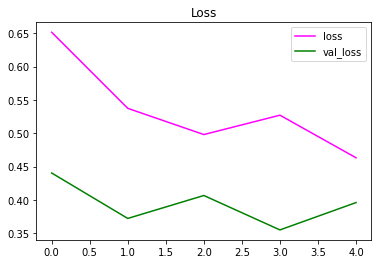

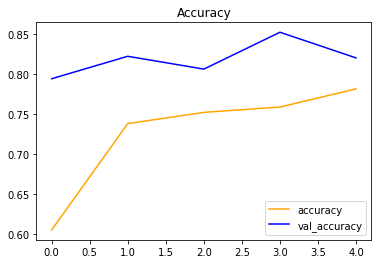

In [ ]:
plot_loss_acc(hist7)

### Making a prediction on our custom data

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg

--2021-09-08 19:32:09--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.109.133, 185.199.111.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.109.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-09-08 19:32:09 (30.0 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]



(-0.5, 3023.5, 4031.5, -0.5)

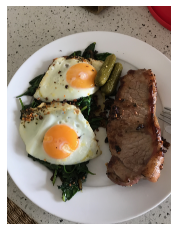

In [ ]:
imyy = img.imread("/content/03-steak.jpeg")
plt.imshow(imyy)
plt.axis("off")

In [ ]:
imyy.shape

(4032, 3024, 3)

In [ ]:
#predict the class of our example
imyy

array([[[162, 158, 149],
        [163, 159, 150],
        [166, 162, 153],
        ...,
        [136,  17,  23],
        [140,  21,  27],
        [140,  21,  27]],

       [[164, 160, 151],
        [164, 160, 151],
        [164, 160, 151],
        ...,
        [133,  14,  20],
        [134,  15,  21],
        [137,  18,  24]],

       [[166, 162, 153],
        [165, 161, 152],
        [163, 159, 150],
        ...,
        [136,  17,  23],
        [134,  15,  21],
        [136,  17,  23]],

       ...,

       [[154, 132, 109],
        [142, 122,  98],
        [101,  80,  59],
        ...,
        [165, 154, 148],
        [152, 141, 135],
        [140, 129, 123]],

       [[141, 119,  95],
        [139, 117,  93],
        [106,  86,  62],
        ...,
        [158, 147, 141],
        [142, 131, 125],
        [138, 127, 121]],

       [[148, 127, 100],
        [149, 127, 103],
        [114,  94,  70],
        ...,
        [153, 142, 136],
        [138, 127, 121],
        [145, 132, 126]]

In [ ]:
k = tf.image.resize(imyy,size=(224,224))
tf.reduce_max(k)

<tf.Tensor: shape=(), dtype=float32, numpy=255.0>

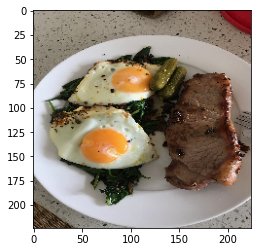

In [ ]:
plt.imshow(k/255.)

In [ ]:
test = k/225.
test.shape

TensorShape([224, 224, 3])

In [ ]:
test_expanded = tf.expand_dims(test,axis=0)
test_expanded.shape

TensorShape([1, 224, 224, 3])

In [ ]:
model_7.predict(test_expanded)

array([[0.96842986]], dtype=float32)

In [ ]:
model_7.predict_step(test_expanded)

<tf.Tensor: shape=(1, 1), dtype=float32, numpy=array([[0.96842986]], dtype=float32)>

In [ ]:
class_names

array(['pizza', 'steak'], dtype='<U9')

In [ ]:
model_7.predict(tf.expand_dims(imyy,axis=0))

ValueError: ignored

In [ ]:
test

<tf.Tensor: shape=(224, 224, 3), dtype=float32, numpy=
array([[[0.7261111 , 0.7083333 , 0.65944445],
        [0.7461111 , 0.715     , 0.67055553],
        [0.72055554, 0.6911111 , 0.6433333 ],
        ...,
        [0.5927778 , 0.05944445, 0.10388889],
        [0.56722224, 0.04722222, 0.08722222],
        [0.60444444, 0.08722222, 0.12722223]],

       [[0.75166667, 0.73388886, 0.6938889 ],
        [0.7238889 , 0.70611113, 0.6572222 ],
        [0.7488889 , 0.7133333 , 0.66444445],
        ...,
        [0.6066667 , 0.07777778, 0.10444444],
        [0.6027778 , 0.06944445, 0.11388889],
        [0.59555554, 0.06222222, 0.10666667]],

       [[0.7411111 , 0.72333336, 0.67      ],
        [0.72944444, 0.6938889 , 0.645     ],
        [0.74722224, 0.71166664, 0.6627778 ],
        ...,
        [0.605     , 0.07611111, 0.09944444],
        [0.605     , 0.075     , 0.11722222],
        [0.595     , 0.06166667, 0.10611111]],

       ...,

       [[0.56277776, 0.48222223, 0.35944444],
        [0.06

In [ ]:
tf.random.gamma((2,6),3)

<tf.Tensor: shape=(2, 6), dtype=float32, numpy=
array([[4.8456235 , 2.550163  , 1.2055886 , 9.275272  , 0.25878367,
        1.6477039 ],
       [4.5433273 , 3.3939893 , 1.3556277 , 6.159426  , 2.0954373 ,
        6.1028156 ]], dtype=float32)>

In [ ]:
def preprocess_image(image,img_shape=224):
  imgy = tf.io.read_file(image)
  imgy = tf.image.decode_image(imgy)
  imgy = tf.image.resize(imgy,size=(img_shape,img_shape))
  imgy = imgy/255.
  return imgy

In [ ]:
image1 = preprocess_image('/content/03-steak.jpeg')

In [ ]:
pred = model_7.predict(tf.expand_dims(image1,axis=0))
pred

array([[0.9687664]], dtype=float32)

In [ ]:
class_names[int(tf.round(pred))]

'steak'

In [ ]:
def custom_pred(model,filename,class_name=class_names):
  img1 = preprocess_image(filename)
  pred = model.predict(tf.expand_dims(img1,axis=0))
  predicted = class_name[int(tf.round(pred))]

  plt.imshow(img1)
  plt.title(f'Predicted class: {predicted}')
  plt.axis(False)
  plt.show();

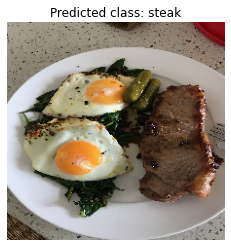

In [ ]:
custom_pred(model_7,'03-steak.jpeg')

--2021-09-08 20:06:18--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.110.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2874848 (2.7M) [image/jpeg]
Saving to: ‘03-pizza-dad.jpeg’

03-pizza-dad.jpeg   100%[===================>]   2.74M  --.-KB/s    in 0.06s   

2021-09-08 20:06:19 (42.3 MB/s) - ‘03-pizza-dad.jpeg’ saved [2874848/2874848]



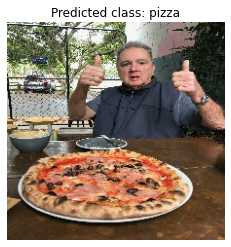

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-pizza-dad.jpeg
custom_pred(model_7,'03-pizza-dad.jpeg') 

### Multi class image classification

In [ ]:
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
zipy = zipfile.ZipFile('10_food_classes_all_data.zip','r')
zipy.extractall()
zipy.close()

--2021-09-09 17:33:56--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 108.177.111.128, 108.177.121.128, 108.177.120.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|108.177.111.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M   152MB/s    in 3.4s    

2021-09-09 17:34:00 (147 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
data_dir = pathlib.Path('/content/10_food_classes_all_data/train/')
class_namess = np.array(sorted(item.name for item in data_dir.glob('*')))
class_namess

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

In [ ]:
train_dir = '/content/10_food_classes_all_data/train/'
test_dir = '/content/10_food_classes_all_data/test/'

53485.jpg
image shape:(512, 384, 3)


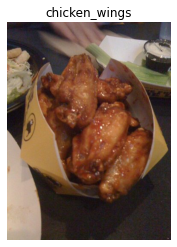

In [ ]:
im = view_img(train_dir,random.choice(class_namess))

#### Preprocess the data


In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
traindatagen = ImageDataGenerator(rescale=1/255.)
testdatagen = ImageDataGenerator(rescale=1/255.)
train_data = traindatagen.flow_from_directory(train_dir,target_size=(224,224),class_mode='categorical')
test_data = testdatagen.flow_from_directory(test_dir,target_size=(224,224),class_mode='categorical')


Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


#### Creating a model

In [ ]:
model_8 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])

In [ ]:
#compile the model
model_8.compile(optimizer=Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])

In [ ]:
#fit the model
hist8 = model_8.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                    validation_data=test_data,validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 54s 224ms/step - loss: 2.1992 - accuracy: 0.1983 - val_loss: 2.0831 - val_accuracy: 0.2544
Epoch 2/5
235/235 [==============================] - 53s 225ms/step - loss: 1.9347 - accuracy: 0.3276 - val_loss: 1.9467 - val_accuracy: 0.3100
Epoch 3/5
235/235 [==============================] - 54s 228ms/step - loss: 1.6360 - accuracy: 0.4560 - val_loss: 1.8984 - val_accuracy: 0.3280
Epoch 4/5
235/235 [==============================] - 53s 226ms/step - loss: 1.0256 - accuracy: 0.6667 - val_loss: 2.3141 - val_accuracy: 0.2916
Epoch 5/5
235/235 [==============================] - 54s 229ms/step - loss: 0.3746 - accuracy: 0.8847 - val_loss: 3.4907 - val_accuracy: 0.2732


### Evaluate the model

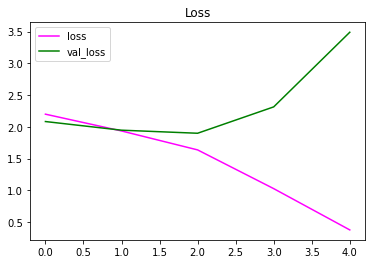

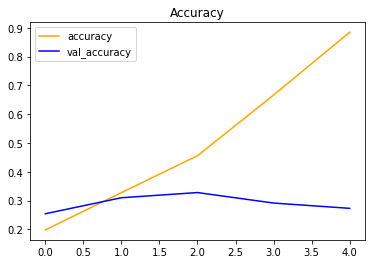

In [ ]:
plot_loss_acc(hist8)

In [ ]:
model_8.evaluate(test_data)

79/79 [==============================] - 12s 156ms/step - loss: 3.4907 - accuracy: 0.2732


[3.4907093048095703, 0.27320000529289246]

#### Adjust the model hyperparameters

In [ ]:
#let's try to reduce the complexity of our model by reducing the number of our conv layers
model_9 = Sequential([
    Conv2D(10,3,activation='relu',input_shape=(224,224,3)),
    # Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Conv2D(10,3,activation='relu'),
    # Conv2D(10,3,activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(10,activation='softmax')
])
#compile the model
model_9.compile(optimizer=Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])
#fit the model
hist9 = model_9.fit(train_data,epochs=5,steps_per_epoch=len(train_data),
                    validation_data=test_data,validation_steps = len(test_data))

Epoch 1/5
235/235 [==============================] - 49s 206ms/step - loss: 2.1627 - accuracy: 0.2261 - val_loss: 1.9915 - val_accuracy: 0.3020
Epoch 2/5
235/235 [==============================] - 48s 206ms/step - loss: 1.8127 - accuracy: 0.3856 - val_loss: 2.0276 - val_accuracy: 0.2828
Epoch 3/5
235/235 [==============================] - 49s 208ms/step - loss: 1.4249 - accuracy: 0.5333 - val_loss: 2.0765 - val_accuracy: 0.2996
Epoch 4/5
235/235 [==============================] - 49s 208ms/step - loss: 0.8825 - accuracy: 0.7236 - val_loss: 2.4908 - val_accuracy: 0.2696
Epoch 5/5
235/235 [==============================] - 48s 206ms/step - loss: 0.4273 - accuracy: 0.8799 - val_loss: 3.0832 - val_accuracy: 0.2728


#### Reducing overfitting with data augmentation

In [ ]:
traindatagen_augm =  ImageDataGenerator(rescale=1/255.,
                                        rotation_range=0.2,
                                        zoom_range = 0.2,
                                        horizontal_flip=True,
                                        shear_range=0.3,
                                        height_shift_range=0.3,
                                        width_shift_range=0.2)
train_data_augm = traindatagen_augm.flow_from_directory(train_dir,target_size=(224,224),class_mode='categorical',shuffle=True)
#test_data_augm = traindatagen_augm.flow_from_directory(test_dir,target_size=(224,224),class_mode='categorical',shuffle=False) 

Found 7500 images belonging to 10 classes.


In [ ]:
model_10 = tf.keras.models.clone_model(model_8)
#compile the model
model_10.compile(optimizer=Adam(),
                loss = 'categorical_crossentropy',
                metrics=['accuracy'])
#fit the model
hist10 = model_10.fit(train_data_augm,epochs=15,steps_per_epoch=len(train_data_augm),
                    validation_data=test_data,validation_steps = len(test_data))


Epoch 1/15
235/235 [==============================] - 130s 551ms/step - loss: 2.2077 - accuracy: 0.1939 - val_loss: 2.0264 - val_accuracy: 0.2752
Epoch 2/15
235/235 [==============================] - 128s 545ms/step - loss: 2.0731 - accuracy: 0.2681 - val_loss: 1.9232 - val_accuracy: 0.3268
Epoch 3/15
235/235 [==============================] - 127s 542ms/step - loss: 2.0052 - accuracy: 0.2953 - val_loss: 1.8834 - val_accuracy: 0.3796
Epoch 4/15
235/235 [==============================] - 127s 540ms/step - loss: 1.9581 - accuracy: 0.3157 - val_loss: 1.7981 - val_accuracy: 0.3804
Epoch 5/15
235/235 [==============================] - 127s 541ms/step - loss: 1.9339 - accuracy: 0.3355 - val_loss: 1.7560 - val_accuracy: 0.3892
Epoch 6/15
235/235 [==============================] - 126s 537ms/step - loss: 1.9212 - accuracy: 0.3344 - val_loss: 1.7528 - val_accuracy: 0.3956
Epoch 7/15
235/235 [==============================] - 126s 537ms/step - loss: 1.8805 - accuracy: 0.3601 - val_loss: 1.6872 -

In [ ]:
model_10.evaluate(test_data)

79/79 [==============================] - 13s 162ms/step - loss: 2.0039 - accuracy: 0.3952


[2.0038750171661377, 0.3952000141143799]

In [ ]:
def custom_pred(model,filename,class_name=class_names):
  img1 = preprocess_image(filename)
  pred = model.predict(tf.expand_dims(img1,axis=0))
  if len(pred[0])>1:
    predicted = class_name[tf.argmax(pred[0])]
  else:
    predicted = class_name[int(tf.round(pred[0]))]

  plt.imshow(img1)
  plt.title(f'Predicted class: {predicted}')
  plt.axis(False)
  plt.show();

In [ ]:
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
!wget https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-sushi.jpeg

--2021-09-09 20:30:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-steak.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.108.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1978213 (1.9M) [image/jpeg]
Saving to: ‘03-steak.jpeg’

03-steak.jpeg       100%[===================>]   1.89M  --.-KB/s    in 0.06s   

2021-09-09 20:30:34 (33.4 MB/s) - ‘03-steak.jpeg’ saved [1978213/1978213]

--2021-09-09 20:30:34--  https://raw.githubusercontent.com/mrdbourke/tensorflow-deep-learning/main/images/03-hamburger.jpeg
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response...

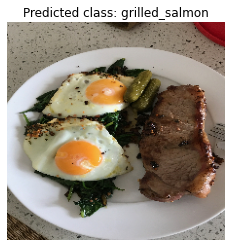

In [ ]:
custom_pred(model_10,'03-steak.jpeg',class_name=class_namess)

In [ ]:
#let's save our model even tho it performed poorly!!
model_10.save('poor_model')

INFO:tensorflow:Assets written to: poor_model/assets


In [ ]:
#load the saved model and check if it performes correctly
poor = tf.keras.models.load_model('poor_model')
poor.evaluate(test_data)

79/79 [==============================] - 13s 157ms/step - loss: 2.0039 - accuracy: 0.3952


[2.003875494003296, 0.3952000141143799]

In [ ]:
model_10.evaluate(test_data)

46/79 [================>.............] - ETA: 5s - loss: 1.9822 - accuracy: 0.3988